In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=((N, D)))
y = tf.placeholder(tf.float32, shape=((N, D)))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
diff =y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss ,[w1, w2])

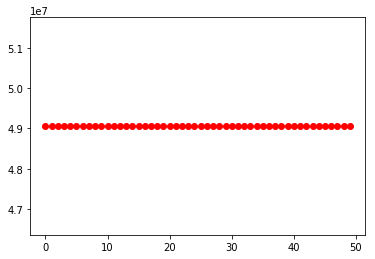

In [12]:
learning_rate=1e-5
new_w1=w1.assign(w1-learning_rate*grad_w1)
new_w2=w2.assign(w2-learning_rate*grad_w2)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D),}
    loss_summary=[]
    for t in range(50):
        loss_val,= sess.run([loss],feed_dict=values)
        loss_summary.append(loss_val)
   
    plt.plot(range(50), loss_summary, 'ro', label='loss_val')
    plt.show()

       
        
       